# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree

from scipy.stats import uniform
from imblearn.over_sampling import SMOTE

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

# Read data
B-cell Lymphoma
is a microarray dataset consists of 3 class of types of cancer

DLBCL (Diffuse Large B-Cell Lymphoma): This is considered an aggressive type of lymphoma. However, it is also one of the most common types and often responds well to chemotherapy. With appropriate treatment, a significant percentage of patients with DLBCL can achieve remission or cure.

FL (Follicular Lymphoma): Follicular lymphoma is usually indolent or slow-growing. While it is not considered curable with current treatments, many patients can live for many years with this condition. Treatments can control the disease, and some individuals may have long periods of remission
.

CLL (Chronic Lymphocytic Leukemia): CLL is a type of leukemia rather than a lymphoma, but it is closely related and affects similar white blood cells. Survival rates for CLL can vary widely, and some patients may not require immediate treatment upon diagnosis. There are various treatment options available, and the disease progression can be slow in many cases.

In [2]:
Lymphoma=pd.read_csv('/kaggle/input/lymphoma/Lymphoma.csv')
Lymphoma.head()

,GENE1835X,GENE1836X,GENE1865X,GENE1380X,GENE1933X,GENE1932X,GENE1931X,GENE1930X,GENE3129X,GENE3126X,...,GENE3931X,GENE2588X,GENE3120X,GENE6X,GENE5X,GENE3X,GENE2X,GENE48X,GENE47X,class
0,0.46,0.70,0.67,-0.23,0.00,0.09,-0.02,-0.57,-0.17,-0.25,...,0.40,0.02,0.79,0.64,0.16,1.22,1.37,-0.04,0.16,b'DLBCL'
1,0.02,0.59,0.45,0.55,-0.08,-0.15,-0.05,-0.38,-0.55,0.35,...,0.57,0.52,-0.23,0.30,0.09,-0.20,-0.05,-0.14,-1.15,b'DLBCL'
2,-0.32,-0.63,-0.46,-0.28,-0.96,-1.17,-1.13,-0.89,-0.49,-0.23,...,1.62,-0.01,NaN,0.29,-0.57,1.20,1.40,0.29,0.25,b'DLBCL'
3,-0.51,-0.45,-0.16,-0.51,-0.58,-0.71,-0.65,-0.82,-0.30,-0.22,...,0.34,0.02,0.08,0.49,0.29,1.26,1.24,0.05,0.70,b'DLBCL'
4,0.20,0.13,0.20,0.09,-0.56,0.00,0.06,-0.15,-0.61,-0.65,...,0.16,0.66,1.11,0.28,0.12,-0.16,-0.72,-0.04,-0.22,b'DLBCL'


In [3]:
Lymphoma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Columns: 4027 entries, GENE1835X to class
dtypes: float64(4026), object(1)
memory usage: 2.0+ MB


In [4]:
Lymphoma.describe().T

,count,mean,std,min,25%,50%,75%,max
GENE1835X,64.0,-0.105469,0.450960,-1.27,-0.3300,0.010,0.1775,0.81
GENE1836X,56.0,-0.111071,0.428764,-1.49,-0.3925,-0.015,0.1625,0.70
GENE1865X,64.0,0.027344,0.454645,-1.12,-0.2475,-0.015,0.3375,0.87
GENE1380X,59.0,-0.017627,0.400079,-0.80,-0.2850,-0.060,0.2850,1.07
GENE1933X,59.0,-0.006102,0.382424,-0.96,-0.2200,-0.020,0.1700,1.12
...,...,...,...,...,...,...,...,...
GENE5X,66.0,-0.018939,0.374031,-0.89,-0.2500,0.010,0.1750,0.79
GENE3X,61.0,0.008852,0.920053,-2.61,-0.5600,0.000,0.5700,2.16
GENE2X,62.0,0.037419,0.850055,-1.72,-0.5500,0.030,0.5700,3.09
GENE48X,59.0,0.020508,0.341893,-0.94,-0.2150,0.060,0.2700,0.64


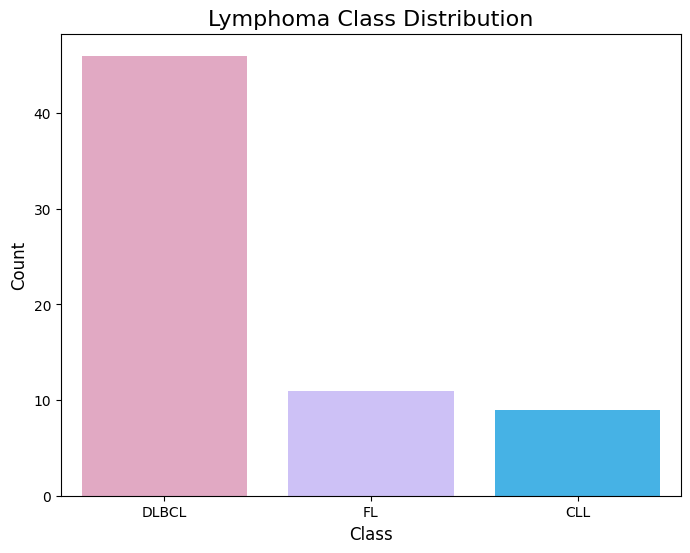

In [5]:
colors = ['#EAA0C2', '#C8B8FF', '#2CBCFF']
# Calculate the count of each class
class_counts = Lymphoma['class'].value_counts()
order = class_counts.index.tolist()
plt.figure(figsize=(8, 6))
sns.countplot(data=Lymphoma, x='class', palette=colors, order=order)
plt.title('Lymphoma Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Assigning meaningful labels to the classes (DLBCL=0 ,FL=1, CLL=2)
plt.xticks([0, 1, 2], ['DLBCL', 'FL', 'CLL'])
plt.show()

# Preprocessing

In [6]:
# there are genes missing
Lymphoma.isna().sum()

GENE1835X     2
GENE1836X    10
GENE1865X     2
GENE1380X     7
GENE1933X     7
             ..
GENE3X        5
GENE2X        4
GENE48X       7
GENE47X       6
class         0
Length: 4027, dtype: int64

In [7]:
# replace genes expression with mean
numeric_columns = Lymphoma.select_dtypes(include=['number']).columns
numeric_columns_to_fill = [col for col in numeric_columns if col != 'class']
Lymphoma[numeric_columns_to_fill] = Lymphoma[numeric_columns_to_fill].fillna(Lymphoma[numeric_columns_to_fill].mean())

In [8]:
# check for dublicated data
duplicated_rows = Lymphoma.duplicated()
print("Number of duplicated rows:", duplicated_rows.sum())

Number of duplicated rows: 0


In [9]:
# rename classes
Lymphoma['class'] = Lymphoma['class'].str.replace("b'", "").str.replace("'", "")
# Check unique values to confirm
print(Lymphoma['class'].unique())
print('Lymphoma shape',Lymphoma.shape)

['DLBCL' 'FL' 'CLL']
Lymphoma shape (66, 4027)


# Resampling classes

In [10]:
# Calculate class distribution before oversampling
original_class_distribution = Lymphoma['class'].value_counts(normalize=True) * 100
print("Original Class Distribution:")
print(original_class_distribution)

# Separate features and labels
X = Lymphoma.drop('class', axis=1)  # Features
y = Lymphoma['class']  # Labels

# Instantiate SMOTE to oversample the minority class within the DataFrame
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Update the DataFrame with the resampled data
Lymphoma = pd.concat([X_resampled, y_resampled], axis=1)

# Calculate class distribution after oversampling
new_class_distribution = Lymphoma['class'].value_counts(normalize=True) * 100
print("\nClass Distribution after SMOTE Oversampling:")
print(new_class_distribution)
print('Lymphoma shape after resampling',Lymphoma.shape)

Original Class Distribution:
class
DLBCL    69.696970
CLL      16.666667
FL       13.636364
Name: proportion, dtype: float64

Class Distribution after SMOTE Oversampling:
class
DLBCL    33.333333
FL       33.333333
CLL      33.333333
Name: proportion, dtype: float64
Lymphoma shape after resampling (138, 4027)


In [11]:
# class distribution (classes are imblanced )
fig = px.pie(Lymphoma, names='class', title='Lymphoma Class Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
# Adjust the size of the pie chart
fig.update_layout(
    autosize=False,
    width=1000,
    height=600
)
fig.show()

In [12]:
Lymphoma_class = Lymphoma["class"]
# mapping classes
Lymphoma["class"] = Lymphoma["class"].map({"DLBCL":0,"FL":1,"CLL":2})

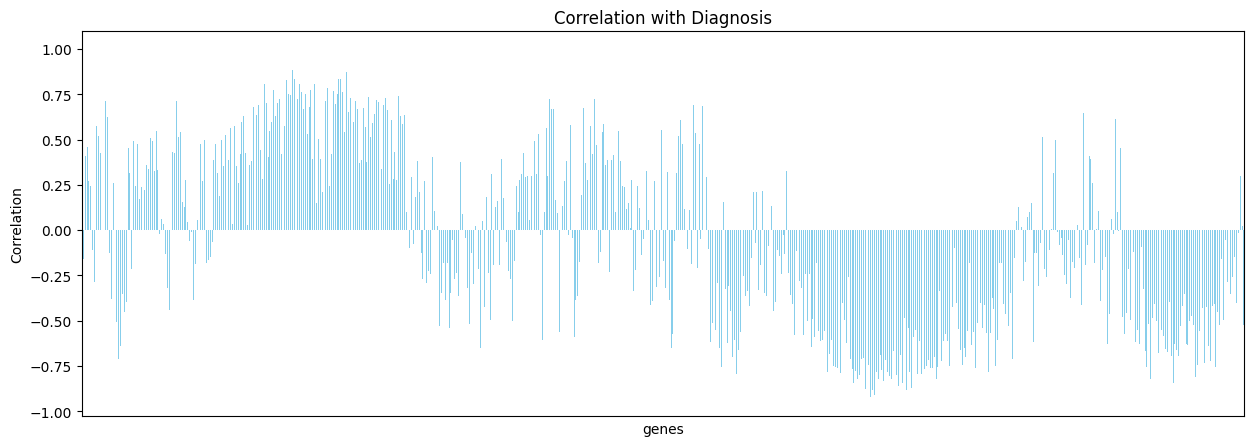

In [13]:
corr = Lymphoma.corr()
class_corr = corr['class']
correlation=class_corr.sort_values(ascending = False)
plt.figure(figsize=(15, 5))
class_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation with Diagnosis')
plt.xlabel('genes')
plt.ylabel('Correlation')
plt.xticks([])
plt.show()

In [14]:
# drop in columns which is high correlated with target
for column in Lymphoma.columns:
    correlation = Lymphoma[column].corr(Lymphoma['class'])  # Calculate the correlation
    if abs(correlation) < 0.5 and abs(correlation) > -0.5 :
        Lymphoma.drop(column, axis=1, inplace=True)

In [15]:
print('number of columns after deleting columns which is low correlated with target :',Lymphoma.shape[1])

number of columns after deleting columns which is low correlated with target : 1613


# classification techniques

In [16]:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors], data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = accuracy_score(predictions, data[outcome])
  print("Accuracy: %s" % "{0:.3%}".format(accuracy))

  kf = KFold(n_splits=5)
  error = []

  for train, test in kf.split(data):
    train_predictors = data[predictors].iloc[train, :]
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))

  print("Cross-Validation Score: %s" % "{0:.3%}".format(np.mean(error)))

  model.fit(data[predictors], data[outcome])

predictor_var = Lymphoma.drop('class', axis=1)
outcome_var = Lymphoma['class']

model = MLPClassifier()

# Shuffle and split the data
X_train, X_test, y_train, y_test = train_test_split(predictor_var, outcome_var, test_size=0.3, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
classification_model(model, train_data, list(predictor_var.columns), 'class')

Accuracy: 100.000%
Cross-Validation Score: 98.947%


## KNeighborsClassifier

In [17]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
}

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'n_neighbors': 3}
Best Accuracy: 1.0


In [18]:
# Best parameters obtained from GridSearchCV
best_params = {'n_neighbors': 3}
# Instantiate the KNN classifier with the best parameters
knn_classifier = KNeighborsClassifier(**best_params)
# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)
# Evaluate the model on training and test sets
train_accuracy = knn_classifier.score(X_train, y_train)
test_accuracy = knn_classifier.score(X_test, y_test)
print("Training Accuracy with Best Parameters:", train_accuracy)
print("Test Accuracy with Best Parameters:", test_accuracy)

Training Accuracy with Best Parameters: 1.0
Test Accuracy with Best Parameters: 0.9761904761904762


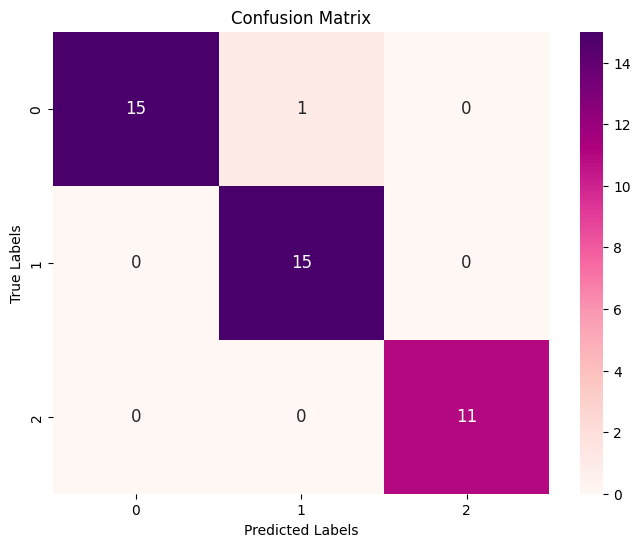

In [19]:
# Predict using the fitted classifier on the test set
knn_pred = knn_classifier.predict(X_test)

# Calculate the confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='RdPu', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
print('\nKNeighborsClassifier report : \n\n',classification_report(y_test,knn_pred))
accuracy = accuracy_score(y_test, knn_pred)

print("Accuracy Score:", accuracy)



KNeighborsClassifier report : 

               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        11

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

Accuracy Score: 0.9761904761904762


## SVC

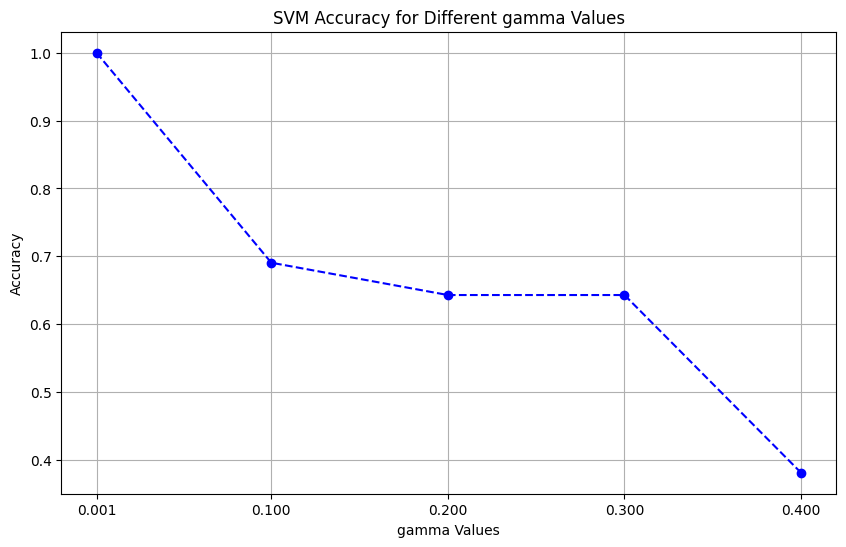

In [21]:
# Different C values to visualize
gamma_values = [0.001, 0.1, 0.2, 0.3,0.4]
accuracy = []
for gamma in gamma_values:
    svm_classifier = SVC(gamma=gamma)
    svm_classifier.fit(X_train, y_train)
    accuracy.append(svm_classifier.score(X_test, y_test))

# Visualize the accuracy for different C values
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, accuracy, marker='o', linestyle='dashed', color='b')
plt.title('SVM Accuracy for Different gamma Values')
plt.xlabel('gamma Values')
plt.ylabel('Accuracy')
plt.xticks(gamma_values)
plt.grid(True)
plt.show()

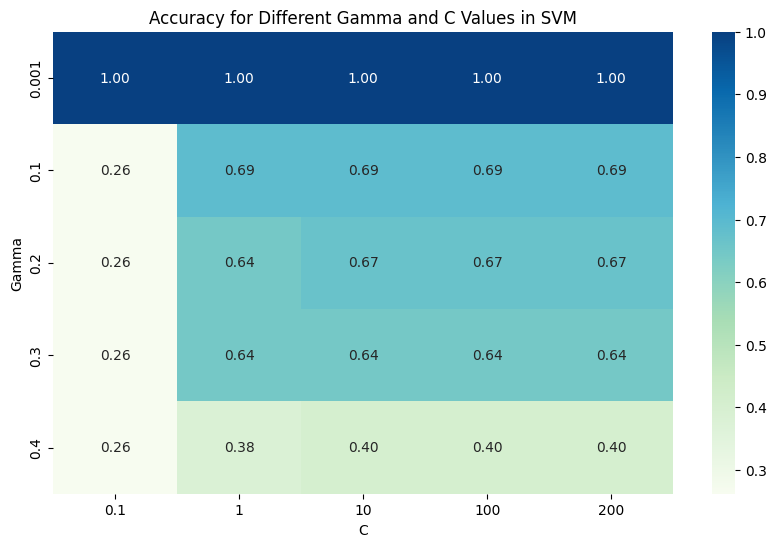

In [22]:
# Different gamma and C values to test
gamma_values = [0.001, 0.1, 0.2, 0.3,0.4]
C_values = [0.1, 1, 10, 100, 200]

accuracy_matrix = []

for gamma in gamma_values:
    accuracy = []
    for C in C_values:
        svm_classifier = SVC(gamma=gamma, C=C)
        svm_classifier.fit(X_train, y_train)
        svm_accuracy = svm_classifier.score(X_test, y_test)
        accuracy.append(svm_accuracy)
    accuracy_matrix.append(accuracy)

accuracy_matrix = np.array(accuracy_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, annot=True, fmt='.2f', cmap='GnBu',
            xticklabels=C_values, yticklabels=gamma_values)
plt.title('Accuracy for Different Gamma and C Values in SVM')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.show()

In [23]:
# Initialize and train the SVM classifier with specified parameters
svm_classifier = SVC(gamma=0.001, C=1)
svm_classifier.fit(X_train, y_train)

# Calculate accuracy on training set
train_accuracy = svm_classifier.score(X_train, y_train)

# Calculate accuracy on test set
test_accuracy = svm_classifier.score(X_test, y_test)

print("Support Vector Machine (SVM) - Training Accuracy:", train_accuracy)
print("Support Vector Machine (SVM) - Test Accuracy:", test_accuracy)

Support Vector Machine (SVM) - Training Accuracy: 1.0
Support Vector Machine (SVM) - Test Accuracy: 1.0


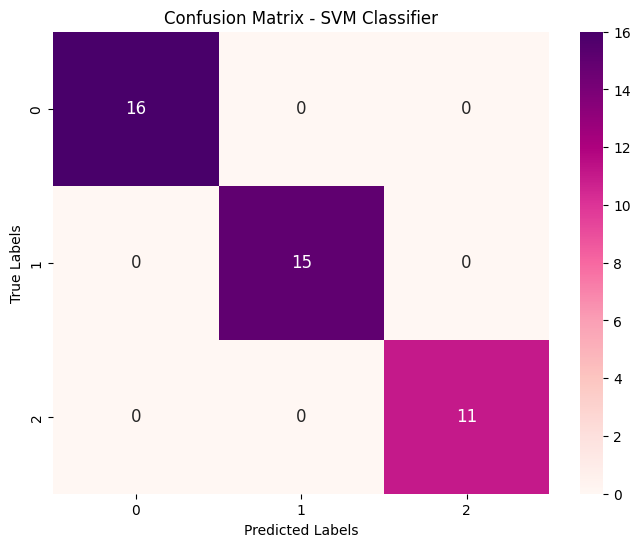

In [24]:
# Make predictions on the test set
svm_pred = svm_classifier.predict(X_test)

# Generate confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='RdPu', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

In [25]:
print('\nKNeighborsClassifier report : \n\n',classification_report(y_test,svm_pred))
accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy Score:", accuracy)


KNeighborsClassifier report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

Accuracy Score: 1.0


## neural network

In [26]:
# Define the parameter grid to search
param_grid = {
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2],
}

# Create an MLPClassifier
nn_classifier = MLPClassifier(random_state=42, max_iter=100)

# Grid search with cross-validation
grid_search = GridSearchCV(nn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extract results from grid search
results = grid_search.cv_results_

# Extract mean test scores from results
mean_test_scores = np.array(results['mean_test_score']).reshape(len(param_grid['activation']), -1)

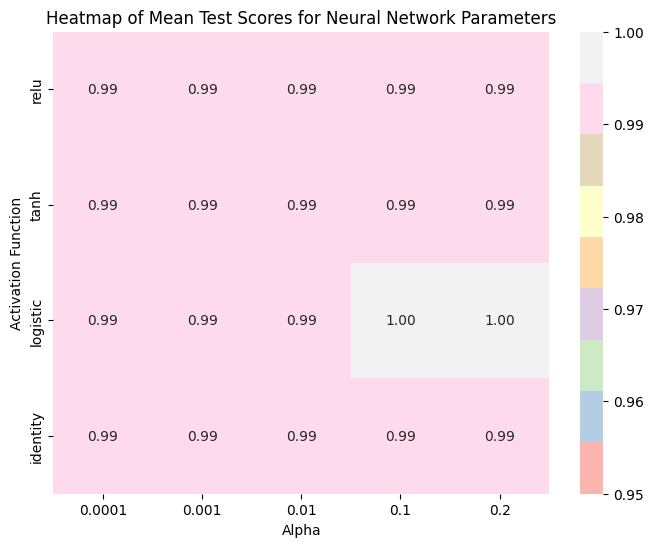

In [27]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(mean_test_scores, annot=True, fmt='.2f', cmap='Pastel1',
            xticklabels=param_grid['alpha'], yticklabels=param_grid['activation'], vmin=0.95, vmax=1.0)
plt.title('Heatmap of Mean Test Scores for Neural Network Parameters')
plt.xlabel('Alpha')
plt.ylabel('Activation Function')
plt.show()

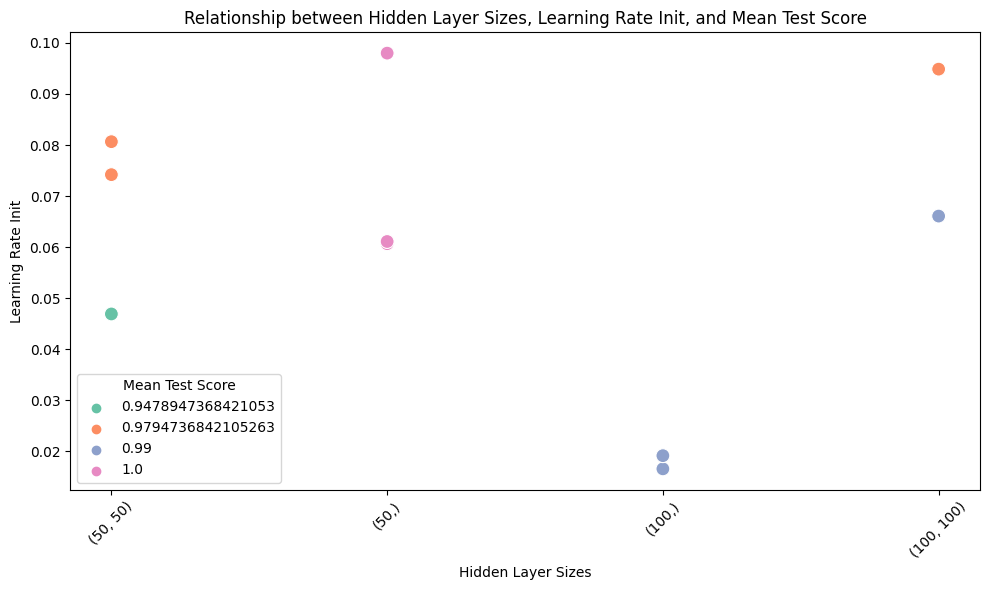

Best Parameters: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0606850157946487}


In [28]:
# Define the parameter distributions for randomized search
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Example hidden layer sizes
    'learning_rate_init': uniform(0.001, 0.1),  # Range of learning rate values
}

# Create an MLPClassifier
nn_classifier = MLPClassifier(random_state=42, max_iter=100)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(nn_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Extract best parameters from randomized search
best_params = random_search.best_params_

# Extract hidden layer sizes and learning rate init values used in the search
hidden_layer_sizes = random_search.cv_results_['param_hidden_layer_sizes'].data
learning_rate_init_values = random_search.cv_results_['param_learning_rate_init'].data

# Create a DataFrame for scatter plot data
results_df = pd.DataFrame({
    'Hidden Layer Sizes': [str(layer_size) for layer_size in hidden_layer_sizes],
    'Learning Rate Init': learning_rate_init_values,
    'Mean Test Score': random_search.cv_results_['mean_test_score']
})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Hidden Layer Sizes', y='Learning Rate Init', hue='Mean Test Score', palette='Set2', s=100)
plt.title('Relationship between Hidden Layer Sizes, Learning Rate Init, and Mean Test Score')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Learning Rate Init')
plt.legend(title='Mean Test Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Best parameters from the randomized search
print("Best Parameters:", best_params)

In [29]:
# Define specific hyperparameters
params = {
    'hidden_layer_sizes': (50,),
    'alpha': 0.1,
    'learning_rate_init': 0.0606850157946487,
    'random_state': 42,
    'activation': 'logistic'
}

# Create and train the MLPClassifier
nn_classifier = MLPClassifier(**params)
nn_classifier.fit(X_train, y_train)
# Calculate accuracy on training set
train_accuracy = nn_classifier.score(X_train, y_train)

# Calculate accuracy on test set
test_accuracy = nn_classifier.score(X_test, y_test)

print("Multi-Layer Perceptron (MLP) - Training Accuracy: ", train_accuracy)
print("Multi-Layer Perceptron (MLP) - Test Accuracy: ", test_accuracy)

Multi-Layer Perceptron (MLP) - Training Accuracy:  1.0
Multi-Layer Perceptron (MLP) - Test Accuracy:  0.9761904761904762


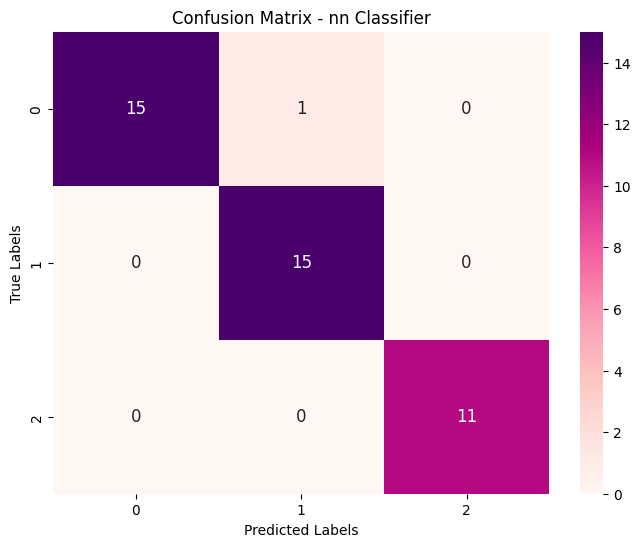

In [30]:
# Make predictions on the test set
nn_pred = nn_classifier.predict(X_test)

# Generate confusion matrix
nn_cm = confusion_matrix(y_test, nn_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='RdPu', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - nn Classifier')
plt.show()

In [31]:
print('\nMLPClassifier report : \n\n',classification_report(y_test,nn_pred))
accuracy = accuracy_score(y_test, nn_pred)
print("Accuracy Score:", accuracy)


MLPClassifier report : 

               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        11

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

Accuracy Score: 0.9761904761904762


# Feature Selection

## 1- filter methods

### A- VarianceThreshold

In [32]:
X = Lymphoma.drop(columns=['class'])
y = Lymphoma['class']
model = RandomForestClassifier()
thresholds = [0.01, 0.02, 0.05, 0.1, 0.2]
best_threshold = None
best_score = 0

for threshold in thresholds:
    # Feature selection using variance threshold
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X)

    # Use a classifier of your choice (e.g., RandomForestClassifier)
    # Evaluate model performance using cross-validation
    scores = cross_val_score(model, X_selected, y, cv=5)

    # Track the best threshold
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Best Accuracy: {best_score}")

Best Threshold: 0.01, Best Accuracy: 1.0


In [33]:
X = Lymphoma.iloc[:, :-1]  # Features
y = Lymphoma['class']  # Target variable
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)
filtered_gene_data = selector.fit_transform(X)
selected_indices = selector.get_support(indices=True)
selected_genes = X.columns[selected_indices]
print("Selected Genes:")
print(selected_genes)

Selected Genes:
Index(['GENE3385X', 'GENE3384X', 'GENE1114X', 'GENE3994X', 'GENE1140X',
       'GENE1141X', 'GENE2533X', 'GENE2534X', 'GENE2535X', 'GENE2536X',
       ...
       'GENE1346X', 'GENE3416X', 'GENE3829X', 'GENE3979X', 'GENE1489X',
       'GENE1812X', 'GENE985X', 'GENE1809X', 'GENE1277X', 'GENE48X'],
      dtype='object', length=1612)


In [34]:
# Method 1: VarianceThreshold
X_var = X[selected_genes]
X_var_train, X_var_test, y_train, y_test = train_test_split(X_var, y, test_size=0.3, random_state=42)

# Create a KNN model with VarianceThreshold features
model_var = KNeighborsClassifier(n_neighbors=5)
model_var.fit(X_var_train, y_train)
y_pred_var = model_var.predict(X_var_test)
accuracy_var = accuracy_score(y_test, y_pred_var) * 100
print(f'Accuracy with VarianceThreshold Features: {accuracy_var:.2f}%')

Accuracy with VarianceThreshold Features: 97.62%


### B- Correlation-based

In [35]:
# Correlation-based Feature Selection
X = Lymphoma.iloc[:, :-1]  # Features
y = Lymphoma['class']  # Target variable
cor_matrix = X.corr()
correlation_threshold = 0.8
highly_correlated_features = np.where(np.abs(cor_matrix) > correlation_threshold)
features_to_remove = set()
for i, j in zip(*highly_correlated_features):
    if i != j and i not in features_to_remove and j not in features_to_remove:
        features_to_remove.add(j)
selected_features = X.drop(columns=X.columns[list(features_to_remove)])

print("Selected Features:")
print(selected_features.head())

Selected Features:
   GENE3385X  GENE1114X  GENE3994X  GENE1140X  GENE2533X  GENE2535X  \
0      -0.16      -0.03       0.40      -0.25      -0.06      -0.90   
1      -2.09      -0.55       0.59      -2.03       0.37       0.24   
2      -0.83      -0.10       1.39       0.72      -0.06       1.67   
3      -0.44       0.06       0.10      -0.52      -0.27      -1.28   
4      -0.53      -0.77      -0.02      -0.17      -0.32      -0.40   

   GENE2536X  GENE2540X  GENE3866X  GENE3442X  ...  GENE1346X  GENE3416X  \
0       0.51      -0.46       0.12       0.05  ...      -0.86      -0.29   
1       1.75      -0.04      -2.32      -0.07  ...      -0.33       0.13   
2       0.72      -0.06       0.85       0.92  ...      -0.06       0.68   
3       0.34       0.32       0.02      -0.07  ...       0.59       0.23   
4       0.40      -0.33       0.06       0.39  ...      -0.01       0.05   

   GENE3829X  GENE3979X  GENE1489X  GENE1812X  GENE985X  GENE1809X  GENE1277X  \
0      -0.59    

In [36]:
NewData = selected_features
NewData["class"] = y
print(NewData.shape)

(138, 961)


In [37]:
# Method 2: Correlation-based Feature Selection
X_corr = selected_features
X_corr_train, X_corr_test , y_train, y_test  = train_test_split(X_corr,y, test_size=0.3, random_state=42)

# Create a KNN model with Correlation-based features
model_corr = KNeighborsClassifier(n_neighbors=5)
model_corr.fit(X_corr_train, y_train)
y_pred_corr = model_corr.predict(X_corr_test)
accuracy_corr = accuracy_score(y_test, y_pred_corr) * 100
print(f'Accuracy with Correlation-based Features: {accuracy_corr:.2f}%')

Accuracy with Correlation-based Features: 97.62%


### C- SelectKBest

In [38]:
X = Lymphoma.drop('class', axis=1)
y = Lymphoma['class']

# Define feature_names with column names
feature_names = list(Lymphoma.drop('class', axis=1).columns)

selector = SelectKBest(score_func=mutual_info_classif, k=400)
X_new = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
#print("Selected features:", selected_feature_names)

In [39]:
# Method 3: SelectKBest
X_k = X_new
X_k_train, X_k_test, y_train, y_test = train_test_split(X_k,y, test_size=0.3, random_state=42)

# Create a KNN model with Correlation-based features
model_k = KNeighborsClassifier(n_neighbors=5)
model_k.fit(X_k_train, y_train)
y_pred_k = model_corr.predict(X_corr_test)
accuracy_corr = accuracy_score(y_test, y_pred_k) * 100
print(f'Accuracy with SelectKBest Features: {accuracy_corr:.2f}%')

Accuracy with SelectKBest Features: 97.62%


## 2- feature importance using RandomForestClassifier

In [40]:
X =Lymphoma.drop('class', axis=1)  # Features
y =Lymphoma['class']  # Target variable
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Top Features and their Importance:")
print(feature_importance_df.head())

Top Features and their Importance:
        Feature  Importance
971    GENE653X    0.023488
256   GENE2403X    0.020808
260   GENE2399X    0.020298
180   GENE2395X    0.019923
1467  GENE1672X    0.019877


<Figure size 640x480 with 0 Axes>

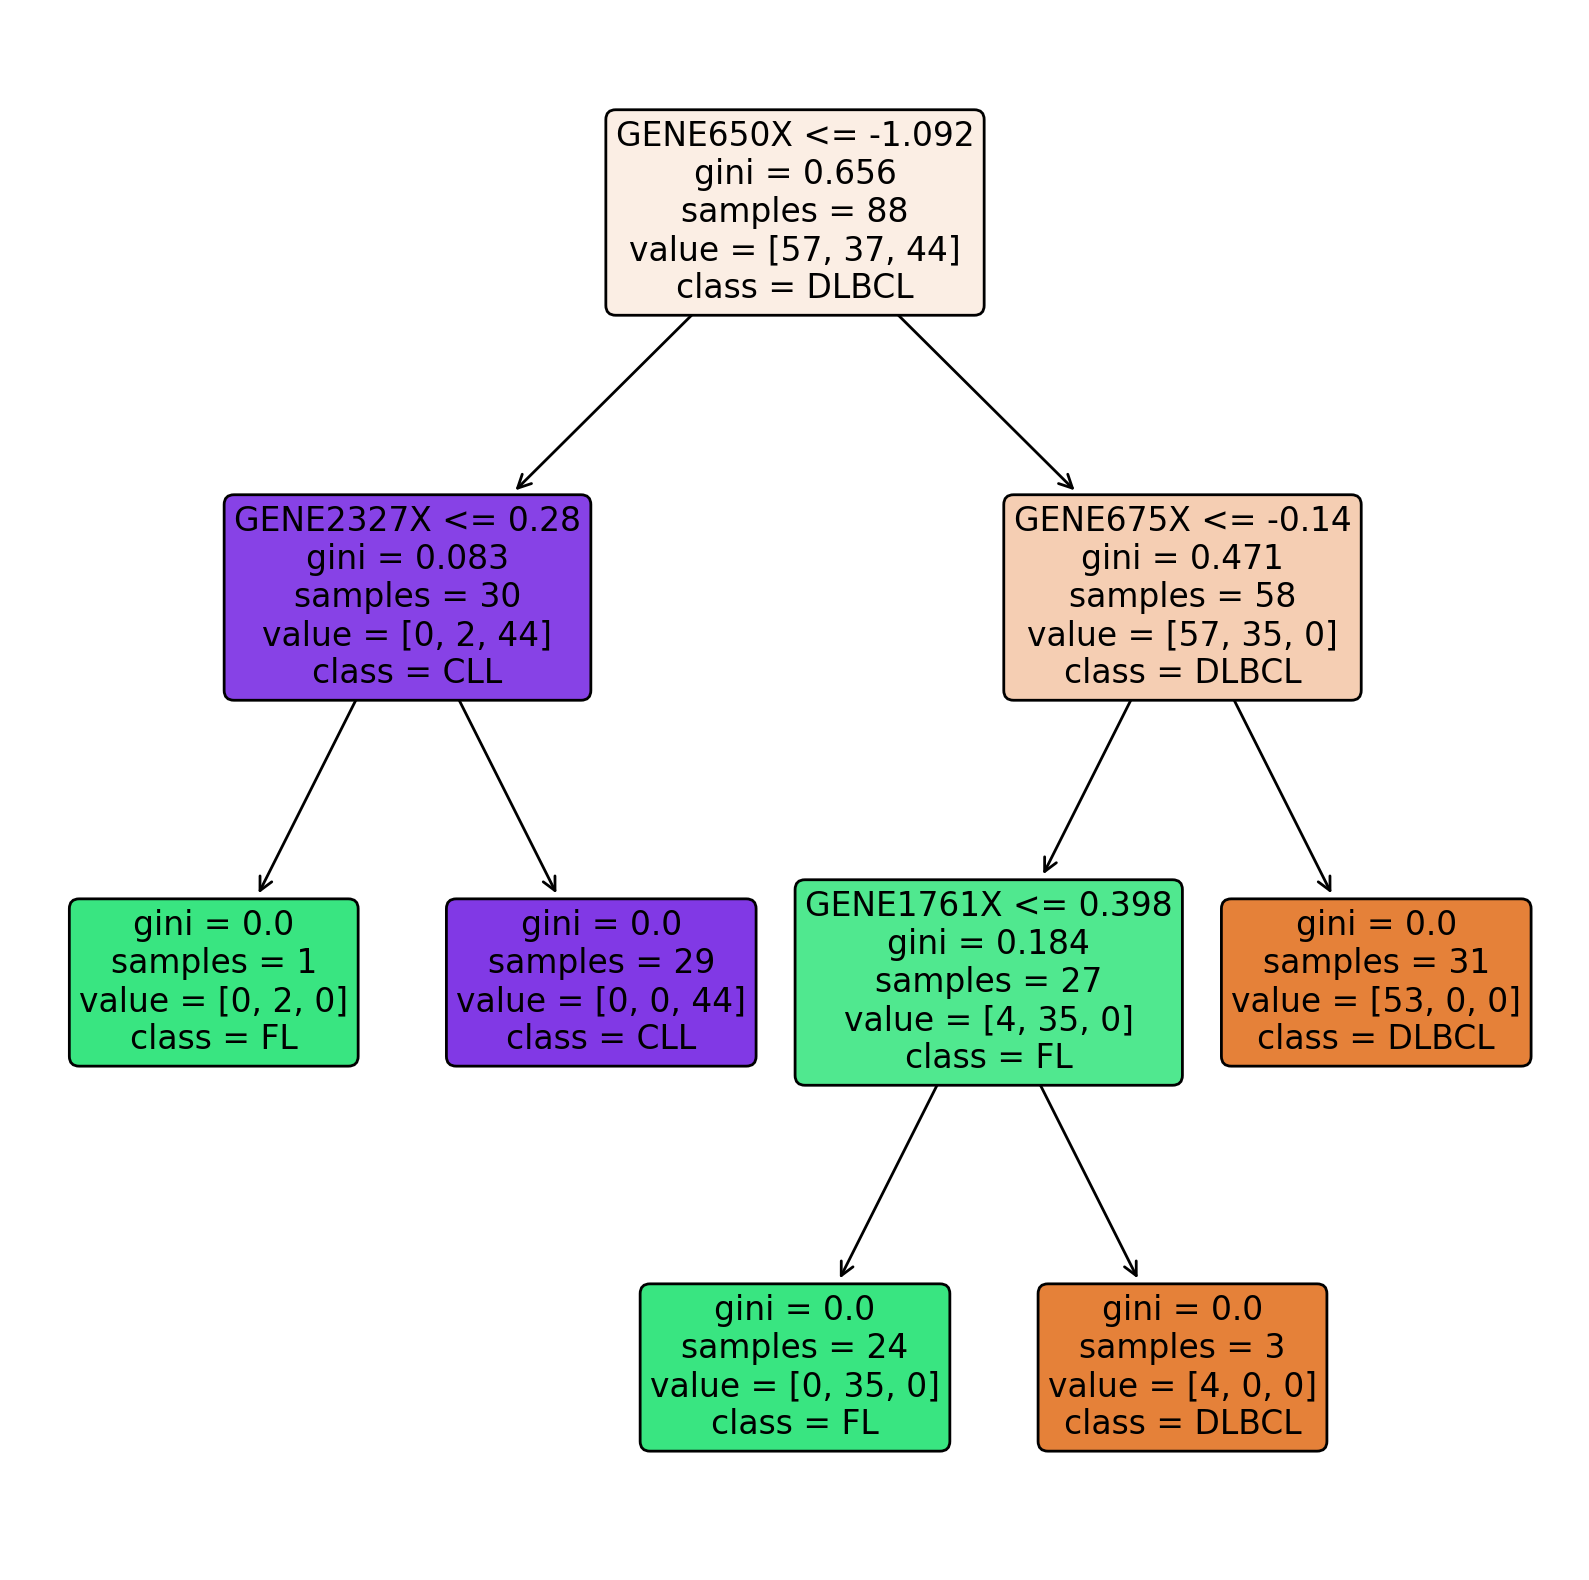

In [41]:
def visualise_tree(tree_to_print):
    plt.figure()
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=200)
    plot_tree(tree_to_print,
               feature_names = X.columns.tolist(),
               class_names=['DLBCL', 'FL', 'CLL'],
               filled = True,
              rounded=True);
    plt.show()
visualise_tree(rf_classifier.estimators_[3])

In [42]:
# Take the top 10 features
top_features = feature_importance_df['Feature'].head(10)
top_importance = feature_importance_df['Importance'].head(10)


colors = px.colors.qualitative.Plotly[:len(top_features)]

fig = go.Figure(go.Bar(
    x=top_importance,
    y=top_features,
    orientation='h',
    marker=dict(color=colors)
))

fig.update_layout(
    title='Top 10 Genes Importance',
    xaxis_title='Importance',
    yaxis_title='Genes',
    bargap=0.5,
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [43]:
top_genes = feature_importance_df.head(2)['Feature'].tolist()
imp_df = X[top_genes].copy()

X_rf_train, X_rf_test, y_train, y_test = train_test_split(imp_df, y , test_size=0.3, random_state=42)

# Create a KNN model with RandomForest feature importance features
model_rf = KNeighborsClassifier(n_neighbors=5)
model_rf.fit(X_rf_train, y_train)
y_pred_rf = model_rf.predict(X_rf_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f'Accuracy with Feature Importance Features: {accuracy_rf:.3f}%')

Accuracy with Feature Importance Features: 95.238%


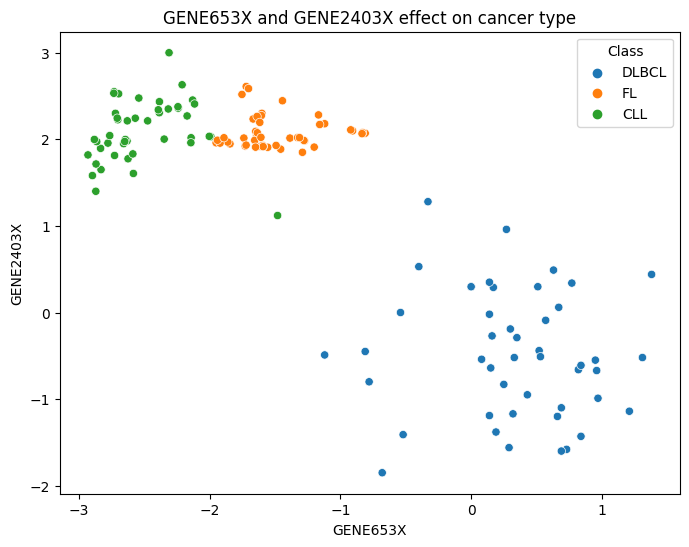

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GENE653X', y='GENE2403X', hue=Lymphoma_class, data=Lymphoma)
plt.title('GENE653X and GENE2403X effect on cancer type')
plt.xlabel('GENE653X')
plt.ylabel('GENE2403X')
plt.legend(title='Class')
plt.show()

## 3- wrapper methods

### A- Feature ranking with Recursive Feature Elimination (RFE)


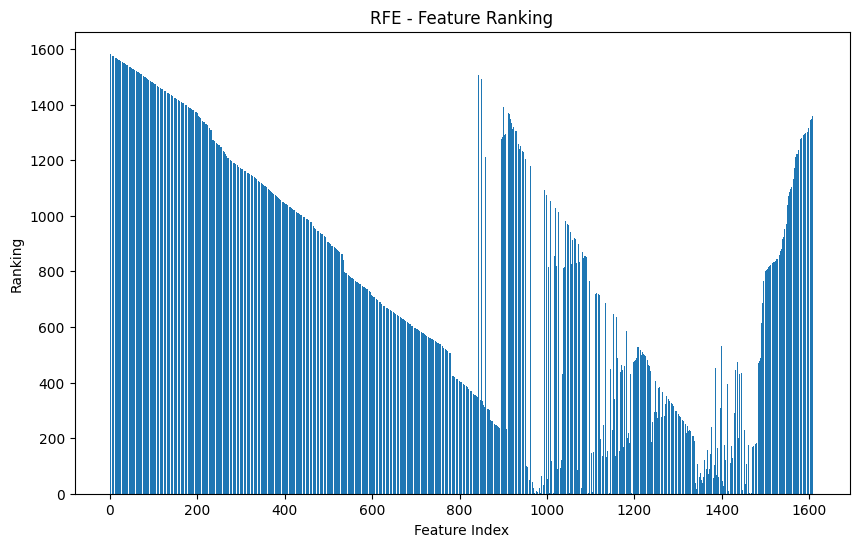

Selected Features: [ 971  972  973  974  977  985  986  989  990  993 1006 1011 1015 1032
 1051 1080 1092 1095 1101 1109 1143 1147 1156 1183 1193 1435 1459 1463
 1467 1468]
Accuracy on the Test Set: 1.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(predictor_var, outcome_var, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

num_features_to_select = 30
rfe = RFE(estimator=model, n_features_to_select = num_features_to_select)

rfe.fit(X_train, y_train)

# ranking of each feature
feature_ranking = rfe.ranking_

selected_features = np.where(feature_ranking == 1)[0]

# Visualize the feature ranking
plt.figure(figsize=(10, 6))
plt.title("RFE - Feature Ranking")
plt.xlabel("Feature Index")
plt.ylabel("Ranking")
plt.bar(range(len(feature_ranking)), feature_ranking)
plt.show()

# Print the selected features
print("Selected Features:", selected_features)

# Train the final model using the selected features
model.fit(X_train.iloc[:, selected_features], y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test.iloc[:, selected_features], y_test)
print("Accuracy on the Test Set:", accuracy)

### B- Forward Selection (SequentialFeatureSelector)

In [46]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Sequential Forward Selection
sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, scoring='accuracy', cv=5)
sfs.fit(X_train.iloc[:, selected_features], y_train)

# Selected features
selected_features = list(X_train.iloc[:, selected_features].columns[list(sfs.k_feature_idx_)])

# Train a model with the selected features
clf.fit(X_train[selected_features], y_train)

# Evaluate the model
accuracy = clf.score(X_test[selected_features], y_test)
print(f"Selected Features: {selected_features}")
print(f"Accuracy on Test Set: {accuracy}")

Selected Features: ['GENE669X', 'GENE598X']
Accuracy on Test Set: 0.9285714285714286


In [47]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train[selected_features], y_train)
# Evaluate the model
accuracy = model_knn.score(X_test[selected_features], y_test)*100
print(f"Selected Features: {selected_features}")
print(f'Accuracy  {accuracy:.3f}%')

Selected Features: ['GENE669X', 'GENE598X']
Accuracy  95.238%


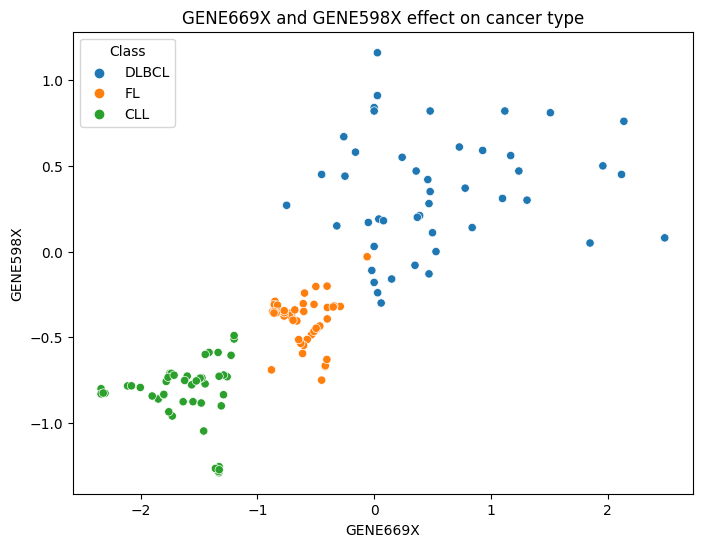

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GENE669X', y='GENE598X', hue=Lymphoma_class, data=Lymphoma)
plt.title('GENE669X and GENE598X effect on cancer type')
plt.xlabel('GENE669X')
plt.ylabel('GENE598X')
plt.legend(title='Class')
plt.show()

# Dimensionality Reduction

## 1- Principal Component Analysis (PCA)

In [49]:
pca= PCA(n_components=6)
X = Lymphoma.drop('class', axis=1)
y = Lymphoma['class']
components = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio: ",explained_variance)

print("New data is :  (",components.shape[0],") rows, (",components.shape[1],") columns")

X_train, X_test, y_train, y_test = train_test_split(components, y, test_size=0.3, random_state=42)
svm= SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)
print("Support Vector Machine (SVM):", svm_accuracy)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)
print("K-Nearest Neighbors (KNN):", knn_accuracy)

nn = MLPClassifier(max_iter = 200)
nn.fit(X_train, y_train)
nn_accuracy = nn.score(X_test, y_test)
print("Neural Network (NN):", nn_accuracy)

Explained Variance Ratio:  [0.51821125 0.08757781 0.0464762  0.02811014 0.02411819 0.01903634]
New data is :  ( 138 ) rows, ( 6 ) columns
Support Vector Machine (SVM): 1.0
K-Nearest Neighbors (KNN): 1.0
Neural Network (NN): 1.0


In [50]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(6),
    color=Lymphoma_class
)
fig.update_layout(width=1000, height=1000)
fig.update_traces(diagonal_visible=False)
fig.show()

In [51]:
# Your code to generate the area chart remains the same
exp_var_cumul=np.cumsum(pca.explained_variance_ratio_)
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

# Update layout properties
fig.update_layout(
    title="Cumulative Explained Variance by Number of Components",
    xaxis_title="Number of Components",
    yaxis_title="Explained Variance",
    width=1000,
    height=500
)

fig.show()


## 2- Gaussian Random Projection

In [52]:
grp = GaussianRandomProjection(n_components=95, eps=0.9, random_state=42)

X = Lymphoma.drop('class', axis=1)
y = Lymphoma['class']

New_Data2 = grp.fit_transform(X)

print("New data is :  (",New_Data2.shape[0],") rows, (",New_Data2.shape[1],") columns")

X_train, X_test, y_train, y_test = train_test_split(New_Data2, y, test_size=0.3, random_state=42)
svm= SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)
print("Support Vector Machine (SVM):", svm_accuracy)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)
print("K-Nearest Neighbors (KNN):", knn_accuracy)

nn = MLPClassifier(max_iter = 200,random_state=42)
nn.fit(X_train, y_train)
nn_accuracy = nn.score(X_test, y_test)
print("Neural Network (NN):", nn_accuracy)

New data is :  ( 138 ) rows, ( 95 ) columns
Support Vector Machine (SVM): 0.9761904761904762
K-Nearest Neighbors (KNN): 0.9761904761904762
Neural Network (NN): 1.0


# **K-Means**

In [53]:
# to determine the optimal number of clusters in a K-means we use WCSS (Within Cluster Sum of Squares)
wcss=[]
for i in range(1,21):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(components)
  wcss.append(kmeans.inertia_)

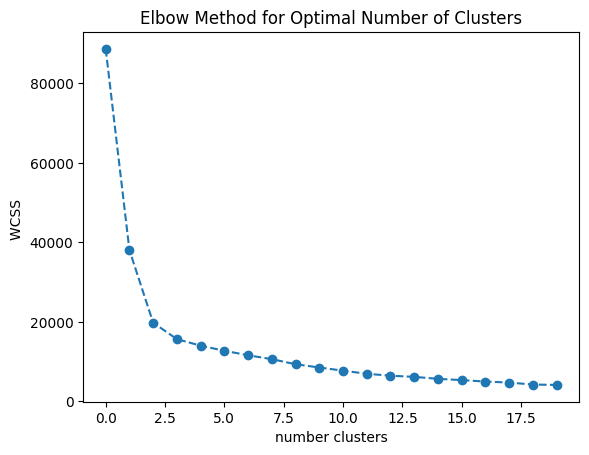

In [54]:
# we use the Elbow-method to detrmine that the optimal number of clusters is 3
plt.plot(wcss,marker='o',linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('number clusters')
plt.ylabel('WCSS ')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(components)


KMeans(n_clusters=3)

In [56]:
# renaming the labels
kmeans_labels = kmeans.labels_
kmeans_label_mapping  = {0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C'}
kmeans_renamed_labels = np.array([kmeans_label_mapping [label] for label in kmeans_labels])


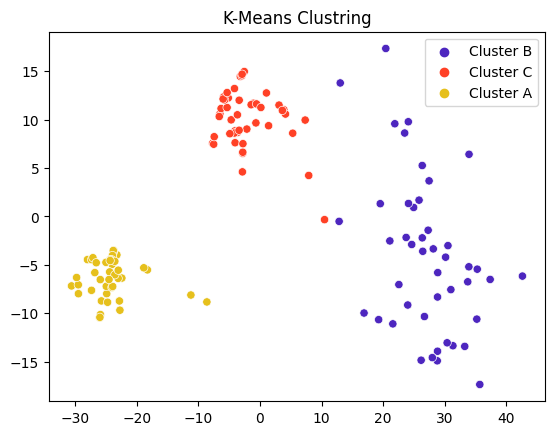

In [57]:
sns.scatterplot(x=components[:, 0],y= components[:, 1],hue=kmeans_renamed_labels,
                palette='CMRmap').set(title='K-Means Clustring')
plt.show()

In [58]:
# kmeans silhouette score
# The Silhouette score is a metric used
# to evaluate how good clustering results are in data clustering
kmeans_silhouette = silhouette_score(components, kmeans_labels)
print("K-means Silhouette Score:", kmeans_silhouette)


K-means Silhouette Score: 0.5510572790163557


# **HC Clustring**

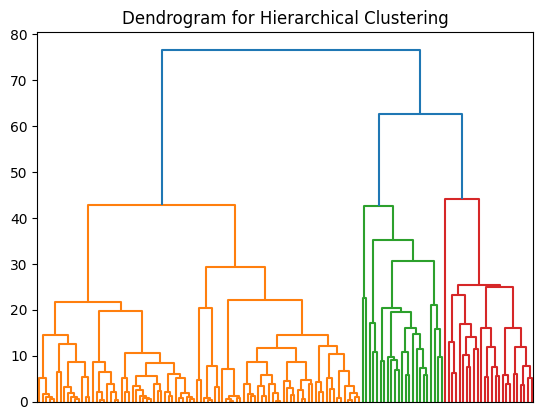

In [59]:
# Using complete linkage
linkage_matrix = linkage(components, method='complete')

# Plot the dendrogram to detrmine optimal num of clusters
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xticks([])
plt.show()


In [60]:

#Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3)
hc = hc.fit_predict(components)



In [61]:
# renaming the labels
hc_label_names = {0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C'}
hc_named_labels = [hc_label_names[label] for label in hc]

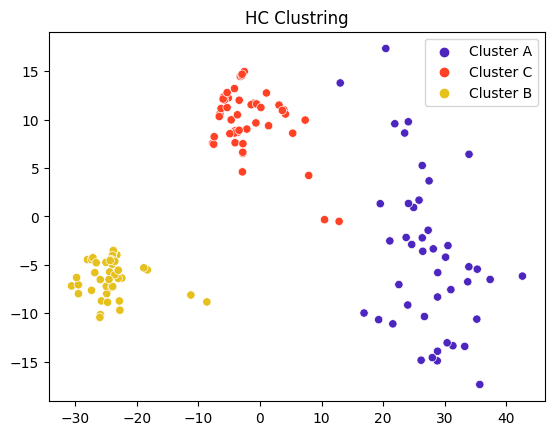

In [62]:

sns.scatterplot(x=components[:, 0],y= components[:, 1],hue=hc_named_labels,
                palette='CMRmap').set(title='HC Clustring')
plt.show()

In [63]:
# hc silhouette score
hc_silhouette = silhouette_score(components, hc)
print("Hierarchical Clustering Silhouette Score:", hc_silhouette)


Hierarchical Clustering Silhouette Score: 0.5468545063812918


# **DBSCAN Clustring**

In [64]:
# we use Nearest Neighbors to detrmine the best value for epsilon which is the most important parameter for dbscan

neigh=NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(components)
distances , indices = nbrs.kneighbors(components)

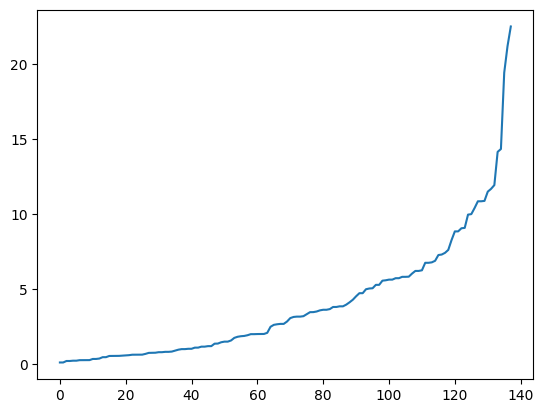

In [65]:
distances=np.sort(distances , axis=0 )
distances=distances[:,1]
plt.plot(distances)

In [66]:

dbscan = DBSCAN(eps=14, min_samples=13) #this is the best values based on the sillhouette score
dbscan = dbscan.fit_predict(components)


In [67]:
# dbscan silhouette score

dbscan_silhouette = silhouette_score(components, dbscan)
print("DBSCAN Silhouette Score:", dbscan_silhouette)


DBSCAN Silhouette Score: 0.5433386672675934


In [68]:
# renaming the lables
dbscan_label_names = {0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C', -1: 'Noise'}
dbscan_named_labels = [dbscan_label_names[label] for label in dbscan]

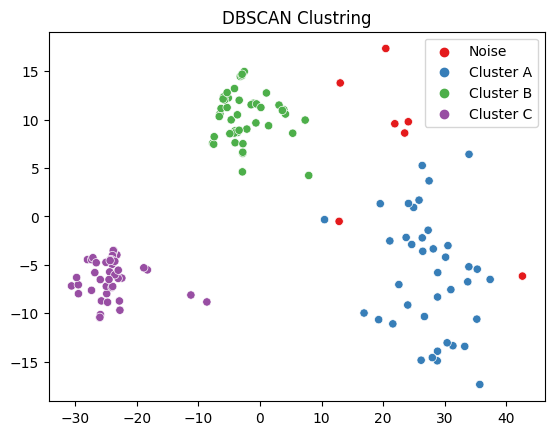

In [69]:

sns.scatterplot(x=components[:, 0],y= components[:, 1],hue=dbscan_named_labels,
                palette='Set1').set(title='DBSCAN Clustring')
plt.show()


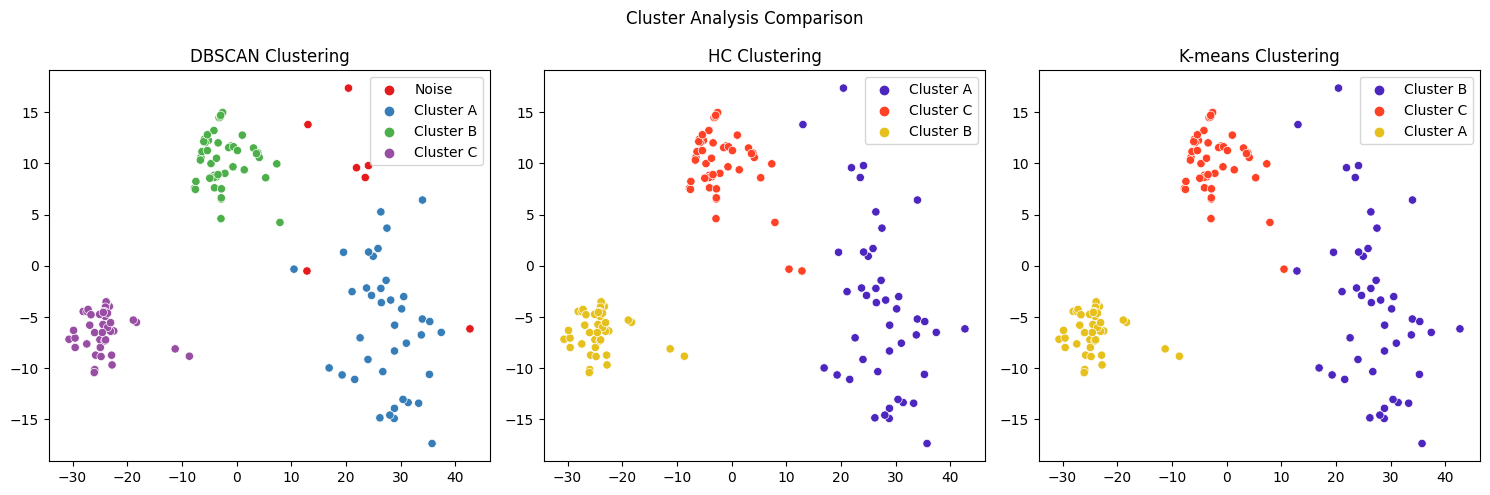

In [70]:
# plotting all for comparison

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# DBSCAN Clustering
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=dbscan_named_labels, palette='Set1', ax=axes[0])
axes[0].set_title('DBSCAN Clustering')

# HC Clustering
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=hc_named_labels, palette='CMRmap', ax=axes[1])
axes[1].set_title('HC Clustering')

# K-means Clustering
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=kmeans_renamed_labels, palette='CMRmap', ax=axes[2])
axes[2].set_title('K-means Clustering')

fig.suptitle('Cluster Analysis Comparison')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()